In [12]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display, Latex

script_dir = os.getcwd()
gvm_root = os.path.abspath(os.path.join(script_dir, '../../'))
sys.path.insert(0, gvm_root)

from gvm.gmv import GVMCombination
from gvm.config import build_input_data


In [13]:
data = build_input_data('input_files/LHC_comb.yaml')

comb_fict = GVMCombination(data)


comb           = GVMCombination(data)

comb.fit()
mu_hat         = comb.fit_results.mu
ci_low, ci_high, ci_half = comb.confidence_interval()
chi2           = comb.goodness_of_fit()
ndof           = comb.n_meas - 1

latex_str = rf"""
\[
  {{\large\textbf{{BLUE result}}}}\\[8pt]
  \boxed{{\quad
    \begin{{aligned}}
      \mathrm{{central\ value}}\,(m_t):\ &{mu_hat:.3f}\\[6pt]
      \mathrm{{confidence\ interval}}:\ &\pm{ci_half:.3f}\\[6pt]
      \chi^2/\mathrm{{NDOF}}:\ &{chi2:.2f}/{ndof}
    \end{{aligned}}
  \quad}}
\]
"""

display(Latex(latex_str))

/Users/enzocanonero/Documents/PhD/tesi-codice/errors-on-errors/top-combination/code3.0/gvm/config.py:199: UserWarning: Correlation matrix "ptmiss" asymmetric for measurements e and f: 0.36 vs 0.86
  warnings.warn(


<IPython.core.display.Latex object>

In [14]:
systematics = ['LHCbJES', 'btag', 'ME', 'LHCJES1', 'LHCJES2', 'method', 'CMSbHad', 'LHCrad']
eps_grid = np.linspace(0.0, 0.6, 7)

base_mu = comb.fit_results.mu
base_ci = comb.confidence_interval()[2]

cv = {s: [] for s in systematics}
ci = {s: [] for s in systematics}

for syst in systematics:
    info = comb.get_input_data(copy=True)
    info.uncertain_systematics.clear()
    info.eoe_type[syst] = 'dependent'
    for eps in eps_grid:
        info.uncertain_systematics[syst] = eps
        comb.set_input_data(info)
        cv[syst].append(comb.fit_results.mu)
        ci[syst].append(comb.confidence_interval()[2])

/Users/enzocanonero/Documents/PhD/tesi-codice/errors-on-errors/top-combination/code3.0/gvm/gmv.py:159: UserWarning: Negative eigenvalue -4.8319e-01 in systematic "btag"; adding 4.9319e-01 to diagonal for regularisation.
  warnings.warn(
/Users/enzocanonero/Documents/PhD/tesi-codice/errors-on-errors/top-combination/code3.0/gvm/gmv.py:159: UserWarning: Negative eigenvalue -3.6380e-01 in systematic "LHCrad"; adding 3.7380e-01 to diagonal for regularisation.
  warnings.warn(


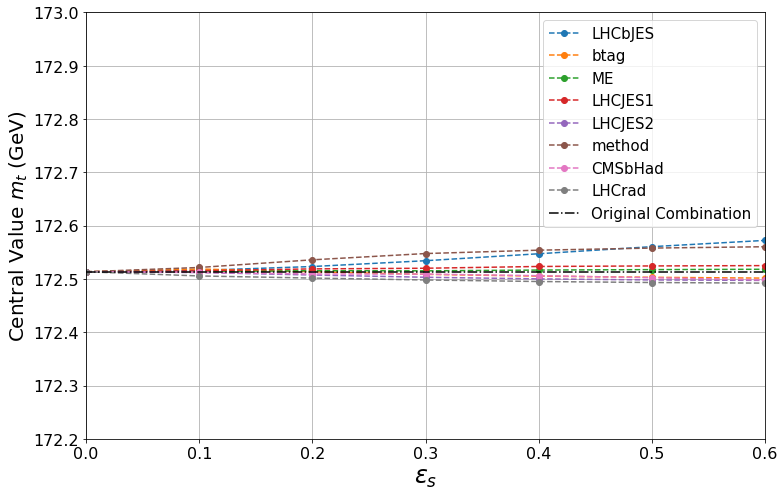

In [15]:
plt.figure(figsize=(11,7))
for s in systematics:
    plt.plot(eps_grid, cv[s], '--o', label=s)
plt.axhline(base_mu, color='black', linestyle='dashdot', label='Original Combination')
plt.xlabel(r'$\epsilon_s$', fontsize=24)
plt.ylabel('Central Value $m_t$ (GeV)', fontsize=20)
plt.xlim(0.0, 0.6)
plt.ylim(172.2, 173.)
plt.legend(fontsize=15)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tight_layout()

plt.savefig("output/central_values.png")
plt.show()

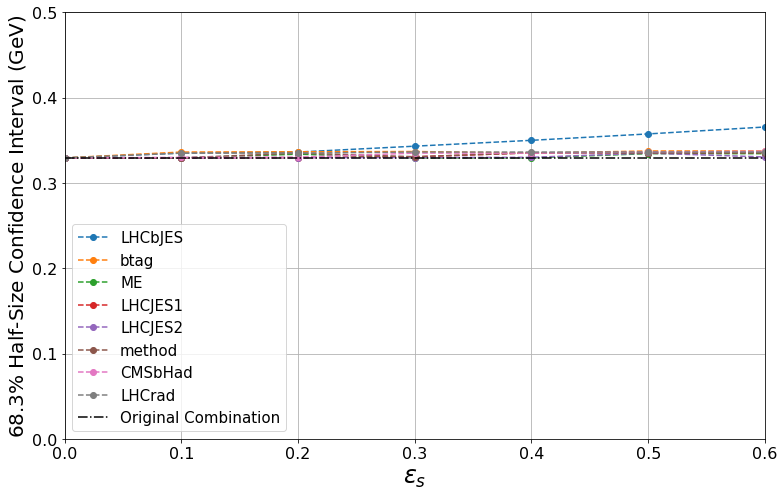

In [16]:
plt.figure(figsize=(11,7))
for s in systematics:
    plt.plot(eps_grid, ci[s], '--o', label=s)
plt.axhline(base_ci, color='black', linestyle='dashdot', label='Original Combination')
plt.xlabel(r'$\epsilon_s$', fontsize=24)
plt.ylabel('$68.3\%$ Half-Size Confidence Interval (GeV)', fontsize=20)
plt.xlim(0.0, 0.6)
plt.ylim(0., 0.5)
plt.legend(fontsize=15, loc='lower left')
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tight_layout()

plt.savefig("output/confidence_intervals.png")
plt.show()

## Combination with fictitious measurement

In [17]:
data = build_input_data('input_files/LHC_comb_fictitious_meas.yaml')

comb_fict = GVMCombination(data)

comb_fict.fit()
mu_hat = comb_fict.fit_results.mu
ci_low, ci_high, ci_half = comb_fict.confidence_interval()
chi2 = comb_fict.goodness_of_fit()
ndof = comb_fict.n_meas - 1

latex_str = rf"""
\[
  {{\large\textbf{{BLUE result}}}}\\[8pt]
  \boxed{{\quad
    \begin{{aligned}}
      \mathrm{{central\ value}}\,(m_t):\ &{mu_hat:.3f}\\[6pt]
      \mathrm{{confidence\ interval}}:\ &\pm{ci_half:.3f}\\[6pt]
      \chi^2/\mathrm{{NDOF}}:\ &{chi2:.2f}/{ndof}
    \end{{aligned}}
  \quad}}
\]
"""

display(Latex(latex_str))

/Users/enzocanonero/Documents/PhD/tesi-codice/errors-on-errors/top-combination/code3.0/gvm/config.py:199: UserWarning: Correlation matrix "ptmiss" asymmetric for measurements e and f: 0.36 vs 0.86
  warnings.warn(


<IPython.core.display.Latex object>

In [ ]:
systematics = ['NEW', 'LHCbJES', 'btag', 'ME', 'LHCJES1', 'LHCJES2', 'method', 'CMSbHad', 'LHCrad']
eps_grid = np.linspace(0., 0.6, 7)

base_mu = comb_fict.fit_results.mu
base_ci = comb_fict.confidence_interval()[2]

cv_fict = {s: [] for s in systematics}
ci_fict = {s: [] for s in systematics}

for syst in systematics:
    info = comb_fict.get_input_data(copy=True)
    info.uncertain_systematics.clear()
    info.eoe_type[syst] = 'dependent'
    for eps in eps_grid:
        info.uncertain_systematics[syst] = eps
        comb_fict.set_input_data(info)
        cv_fict[syst].append(comb_fict.fit_results.mu)
        ci_fict[syst].append(comb_fict.confidence_interval()[2])

/Users/enzocanonero/Documents/PhD/tesi-codice/errors-on-errors/top-combination/code3.0/gvm/gmv.py:159: UserWarning: Negative eigenvalue -4.8319e-01 in systematic "btag"; adding 4.9319e-01 to diagonal for regularisation.
  warnings.warn(


In [ ]:
plt.figure(figsize=(11,7))
for s in systematics:
    plt.plot(eps_grid, cv_fict[s], '--o', label=s)
plt.axhline(base_mu, color='black', linestyle='dashdot', label='Original Combination')
plt.xlabel(r'$\epsilon_s$', fontsize=24)
plt.ylabel('Central Value $m_t$ (GeV)', fontsize=20)
plt.xlim(0.0, 0.6)
plt.ylim(172.4, 173.9)
plt.legend(fontsize=15)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tight_layout()

plt.savefig("output/central_values_fict.png")
plt.show()

In [ ]:
plt.figure(figsize=(11,7))
for s in systematics:
    plt.plot(eps_grid, ci_fict[s], '--o', label=s)
plt.axhline(base_ci, color='black', linestyle='dashdot', label='Original Combination')
plt.xlabel(r'$\epsilon_s$', fontsize=24)
plt.ylabel('$68.3\%$ Half-Size Confidence Interval (GeV)', fontsize=20)
plt.xlim(0.0, 0.6)
plt.ylim(0., 0.5)
plt.legend(fontsize=15, loc='lower left')
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tight_layout()

plt.savefig("output/confidence_intervals_fict.png")
plt.show()